### Relatório - Alocador de Memória Pessoal - Parte 2 ###
Keny Lucas Souza

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as spline

In [2]:
workload0 = pd.read_csv('exitworkloadMem0.csv') 
workload1 = pd.read_csv('exitworkloadMem1.csv')
workload2 = pd.read_csv('exitworkloadMem2.csv')

vetworkload0 = list(range(len(workload0)))
vetworkload1 = list(range(len(workload1)))
vetworkload2 = list(range(len(workload2)))

for i in range(0,len(workload0)):
    vetworkload0[i] = i+1

for i in range(0,len(workload1)):
    vetworkload1[i] = i+1

for i in range(0,len(workload2)):
    vetworkload2[i] = i+1

In [3]:
falhas0 = list(range(len(workload0)))

if(workload0.iloc[0][1] == 'não alocado'):
    falhas0[0] = 1
else:
    falhas0[0] = 0
    
    
for i in range(1, len(workload0)):
    if workload0.iloc[i][1] == 'não alocado':
        falhas0[i] = falhas0[i-1] + 1
    else:
        falhas0[i] = falhas0[i-1]

In [4]:
falhas1 = list(range(len(workload1)))

if(workload1.iloc[0][1] == 'não alocado'):
    falhas1[0] = 1
else:
    falhas1[0] = 0
    
    
for i in range(1, len(workload1)):
    if workload1.iloc[i][1] == 'não alocado':
        falhas1[i] = falhas1[i-1] + 1
    else:
        falhas1[i] = falhas1[i-1]

In [5]:
falhas2 = list(range(len(workload2)))

if(workload2.iloc[0][1] == 'não alocado'):
    falhas2[0] = 1
else:
    falhas2[0] = 0
    
    
for i in range(1, len(workload2)):
    if workload2.iloc[i][1] == 'não alocado':
        falhas2[i] = falhas2[i-1] + 1
    else:
        falhas2[i] = falhas2[i-1]

In [6]:
workload0.insert(5,"qntFalhas",falhas0)
workload1.insert(5,"qntFalhas",falhas1)
workload2.insert(5,"qntFalhas",falhas2)

In [7]:
qntElementos0   = list(workload0.iloc[:,2].values)
media0          = list(workload0.iloc[:,3].values)
espacoVazio0    = list(workload0.iloc[:,4].values)
qntFalhas0      = list(workload0.iloc[:,5].values)

qntElementos1   = list(workload1.iloc[:,2].values)
media1          = list(workload1.iloc[:,3].values)
espacoVazio1    = list(workload1.iloc[:,4].values)
qntFalhas1      = list(workload1.iloc[:,5].values)

qntElementos2   = list(workload1.iloc[:,2].values)
media2          = list(workload1.iloc[:,3].values)
espacoVazio2    = list(workload1.iloc[:,4].values)
qntFalhas2      = list(workload1.iloc[:,5].values)

# Gráficos #
## Next x Best x First ##

#### Quantidade de Elementos ####

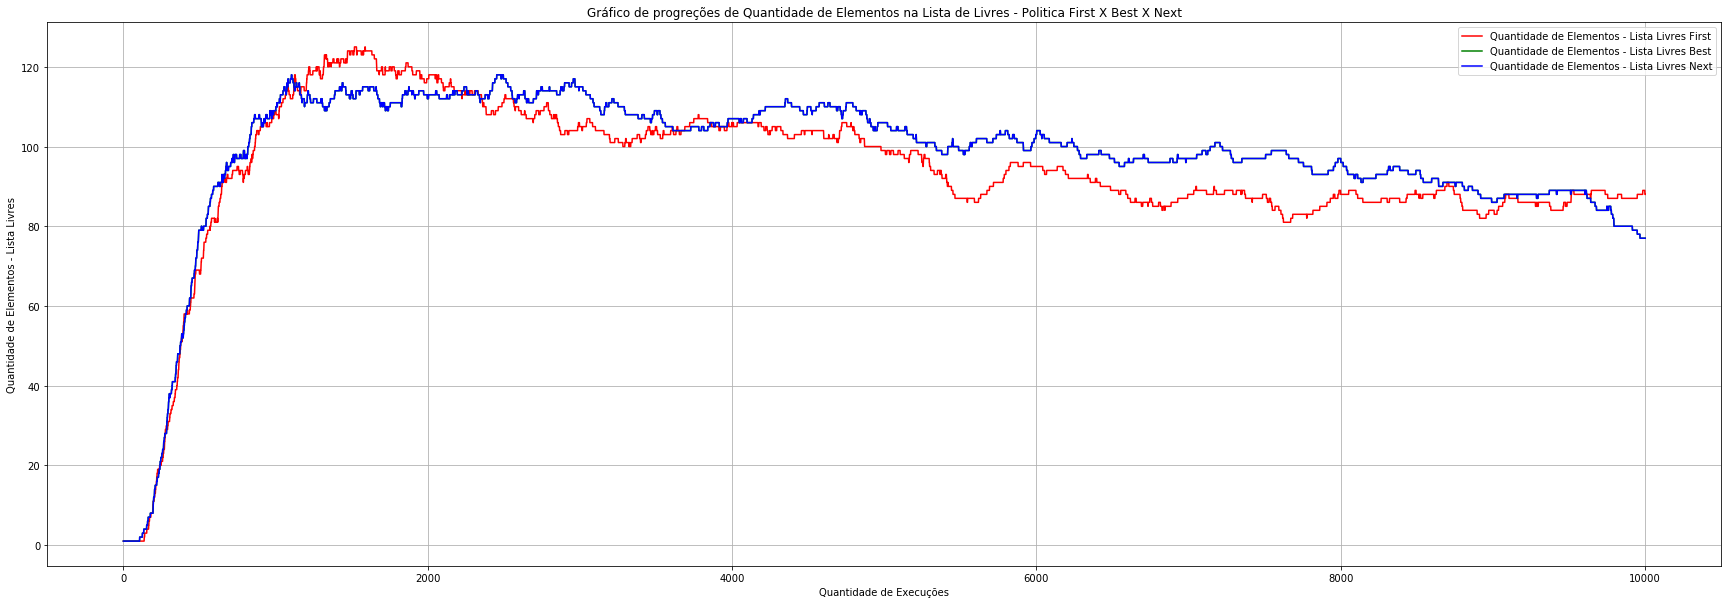

In [10]:
plt.figure()
plt.plot(vetworkload0,qntElementos0,"r-",label="Quantidade de Elementos - Lista Livres First")
plt.plot(vetworkload1,qntElementos1,"g-",label="Quantidade de Elementos - Lista Livres Best")
plt.plot(vetworkload2,qntElementos2,"b-",label="Quantidade de Elementos - Lista Livres Next")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Quantidade de Elementos na Lista de Livres - Politica First X Best X Next")
plt.ylabel("Quantidade de Elementos - Lista Livres")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

#### Média dos Blocos ####

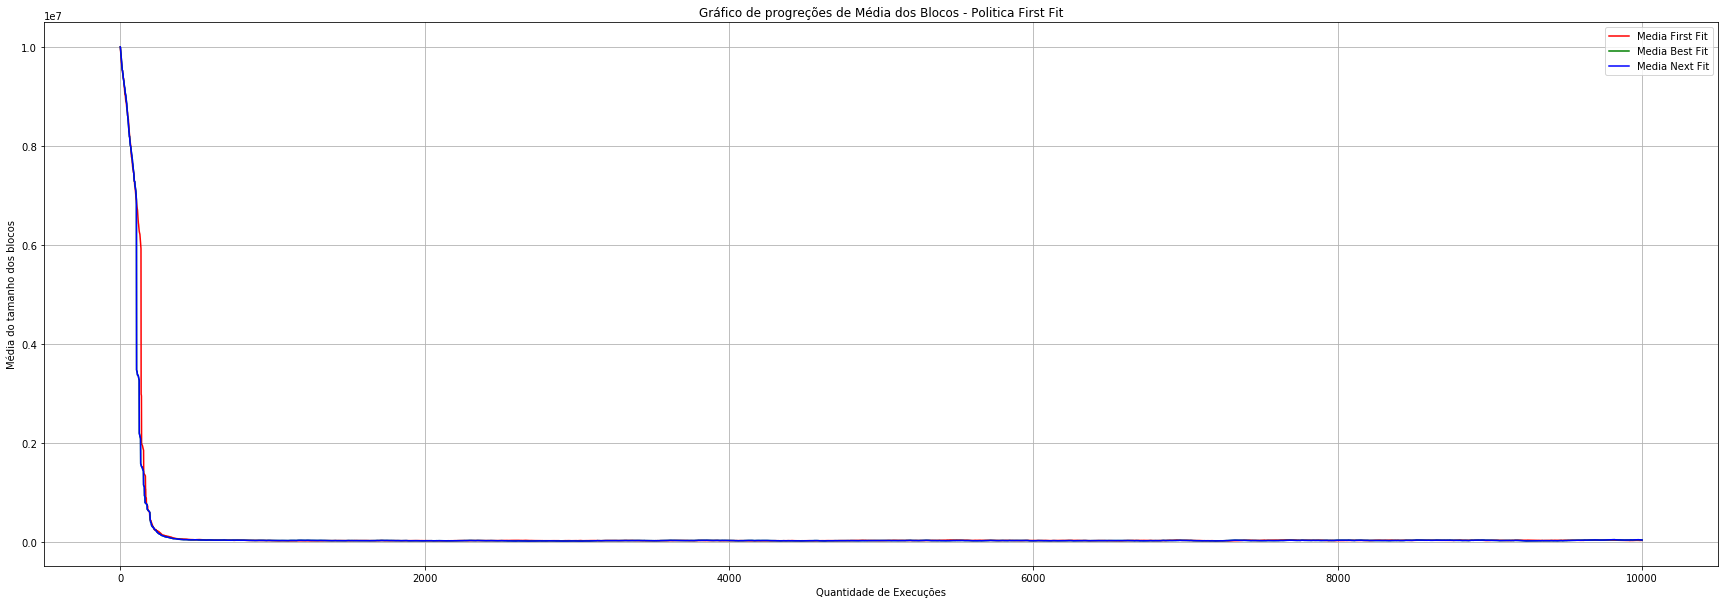

In [9]:
plt.figure()
plt.plot(vetworkload0,media0,"r-",label="Media First Fit")
plt.plot(vetworkload1,media1,"g-",label="Media Best Fit")
plt.plot(vetworkload2,media2,"b-",label="Media Next Fit")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Média dos Blocos - Politica First Fit")
plt.ylabel("Média do tamanho dos blocos")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

#### Espaço Livre por Execução ####

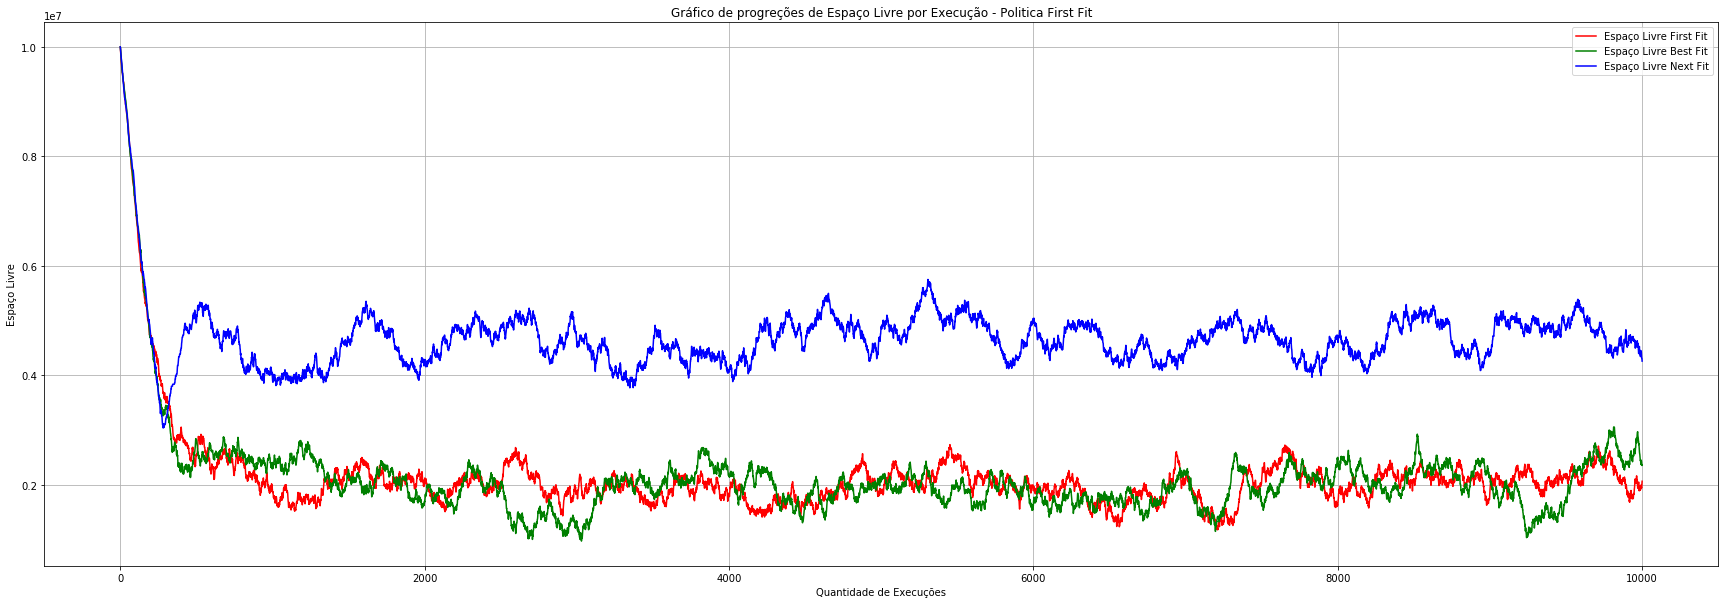

In [26]:
plt.figure()
plt.plot(vetworkload0,espacoVazio0,"r-",label="Espaço Livre First Fit")
plt.plot(vetworkload1,espacoVazio1,"g-",label="Espaço Livre Best Fit")
plt.plot(vetworkload2,espacoVazio2,"b-",label="Espaço Livre Next Fit")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Espaço Livre por Execução - Politica First Fit")
plt.ylabel("Espaço Livre")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

#### Falhas em Alocação ###

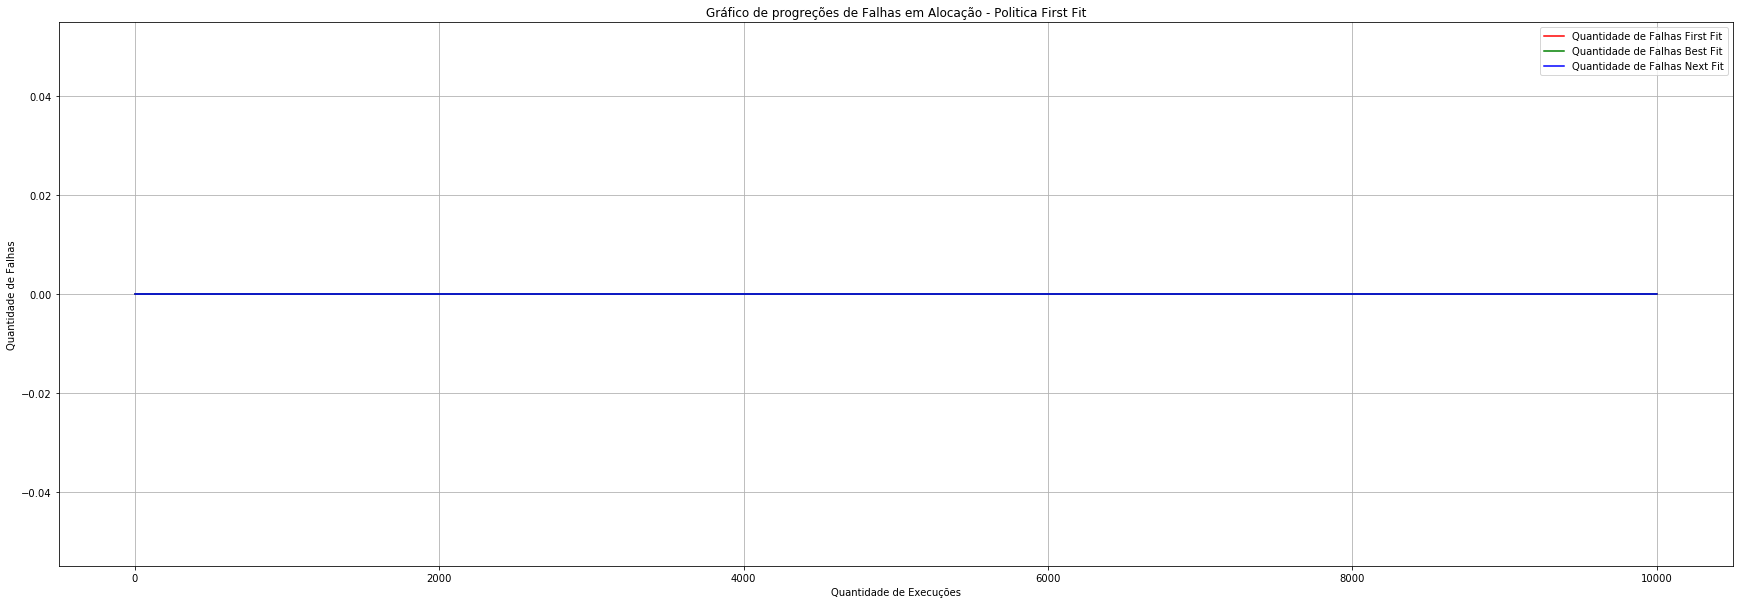

In [12]:
plt.figure()
plt.plot(vetworkload0,qntFalhas0,"r-",label="Quantidade de Falhas First Fit")
plt.plot(vetworkload1,qntFalhas1,"g-",label="Quantidade de Falhas Best Fit")
plt.plot(vetworkload2,qntFalhas2,"b-",label="Quantidade de Falhas Next Fit")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Falhas em Alocação - Politica First Fit")
plt.ylabel("Quantidade de Falhas")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

## First ##

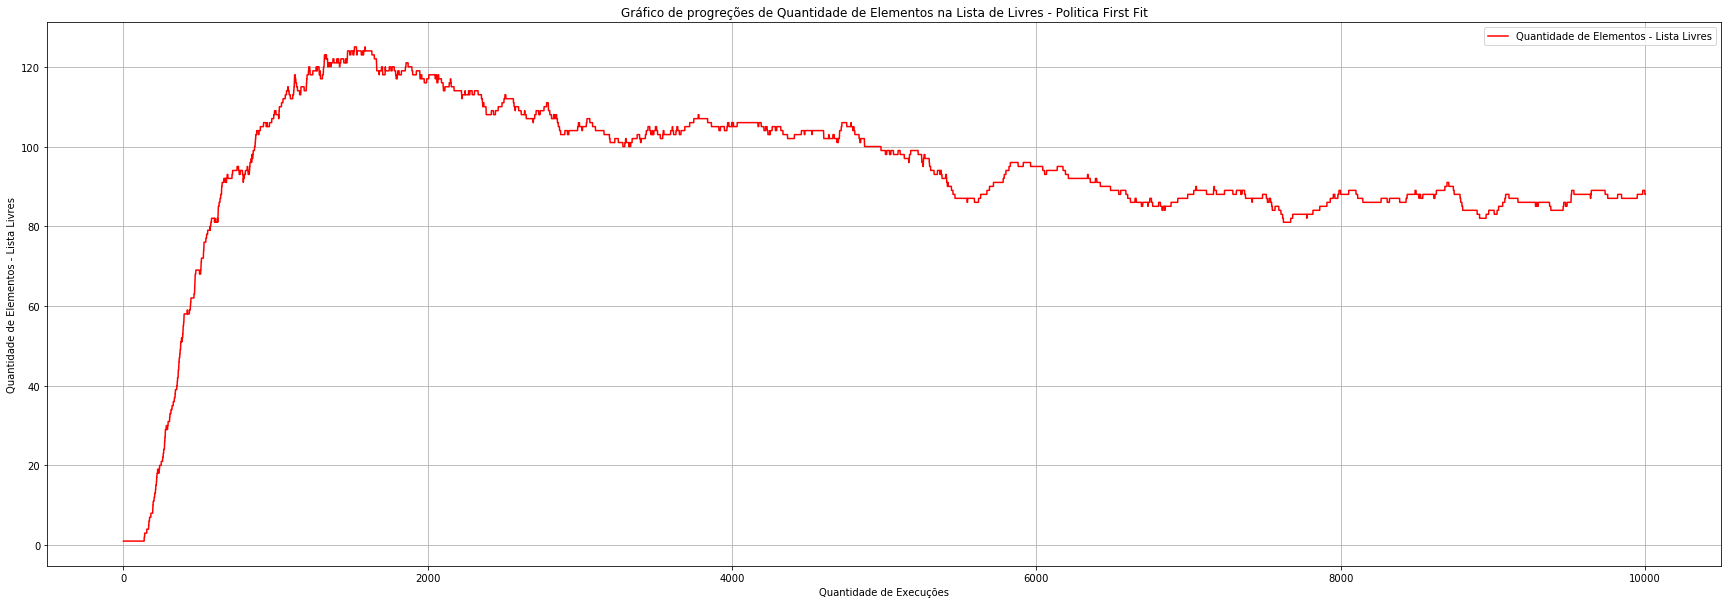

In [13]:
plt.figure()
plt.plot(vetworkload0,qntElementos0,"r-",label="Quantidade de Elementos - Lista Livres")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Quantidade de Elementos na Lista de Livres - Politica First Fit")
plt.ylabel("Quantidade de Elementos - Lista Livres")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

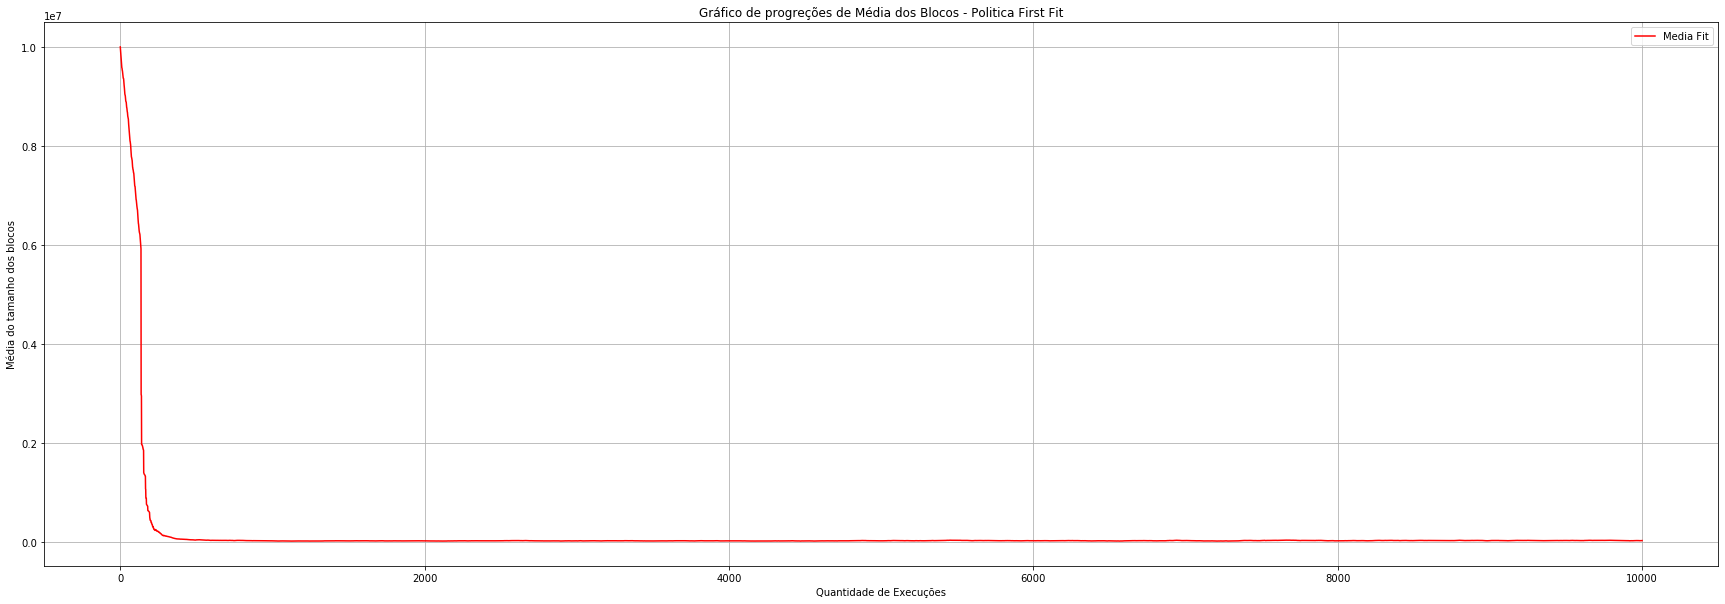

In [15]:
plt.figure()
plt.plot(vetworkload0,media0,"r-",label="Media Fit")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Média dos Blocos - Politica First Fit")
plt.ylabel("Média do tamanho dos blocos")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

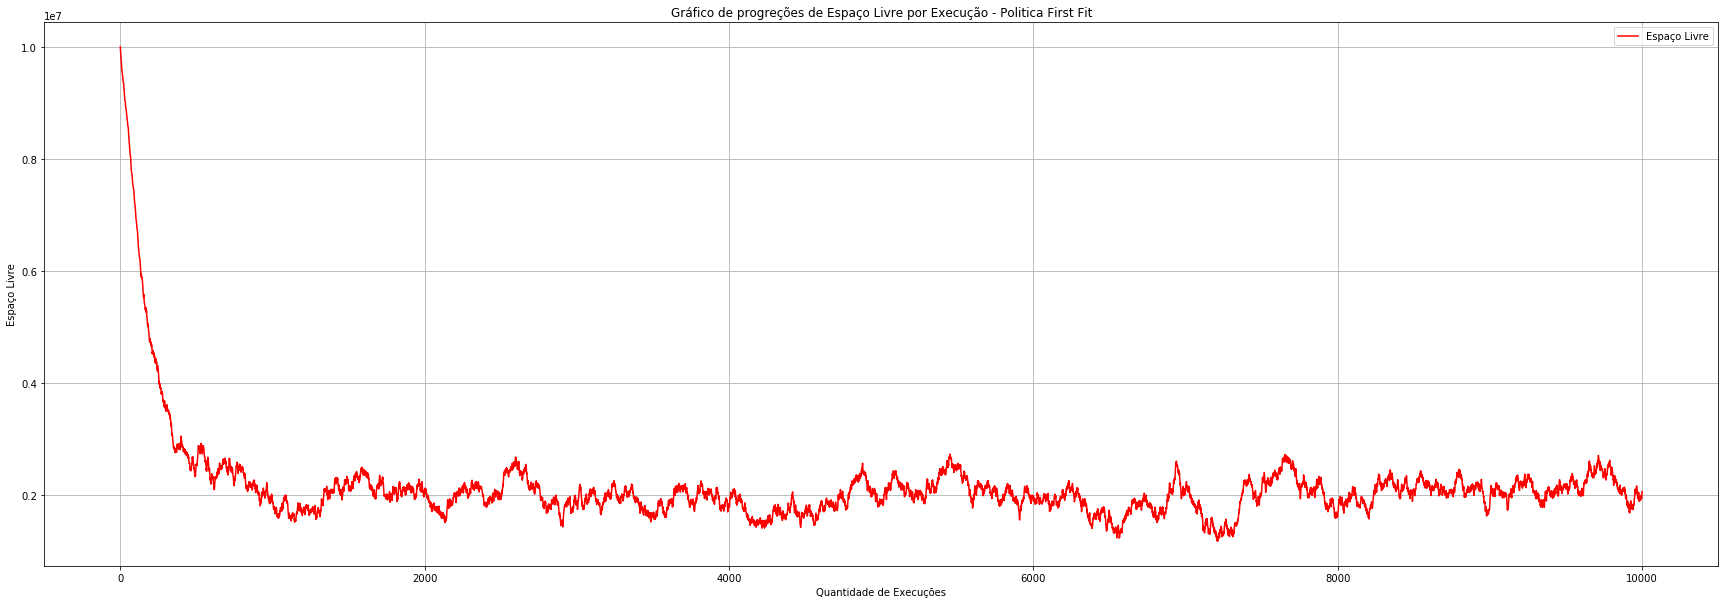

In [14]:
plt.figure()
plt.plot(vetworkload0,espacoVazio0,"r-",label="Espaço Livre")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Espaço Livre por Execução - Politica First Fit")
plt.ylabel("Espaço Livre")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

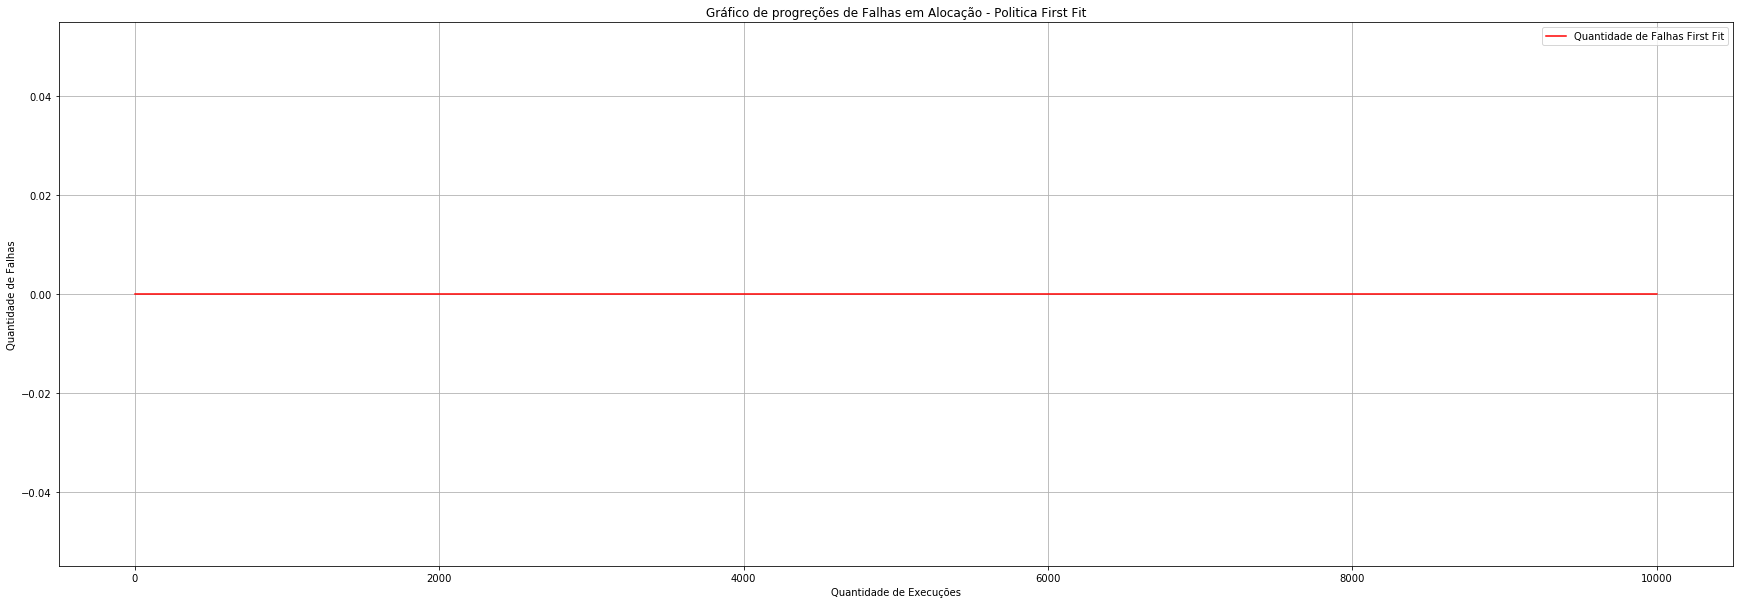

In [16]:
plt.figure()
plt.plot(vetworkload0,qntFalhas0,"r-",label="Quantidade de Falhas First Fit")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Falhas em Alocação - Politica First Fit")
plt.ylabel("Quantidade de Falhas")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

### Best ###

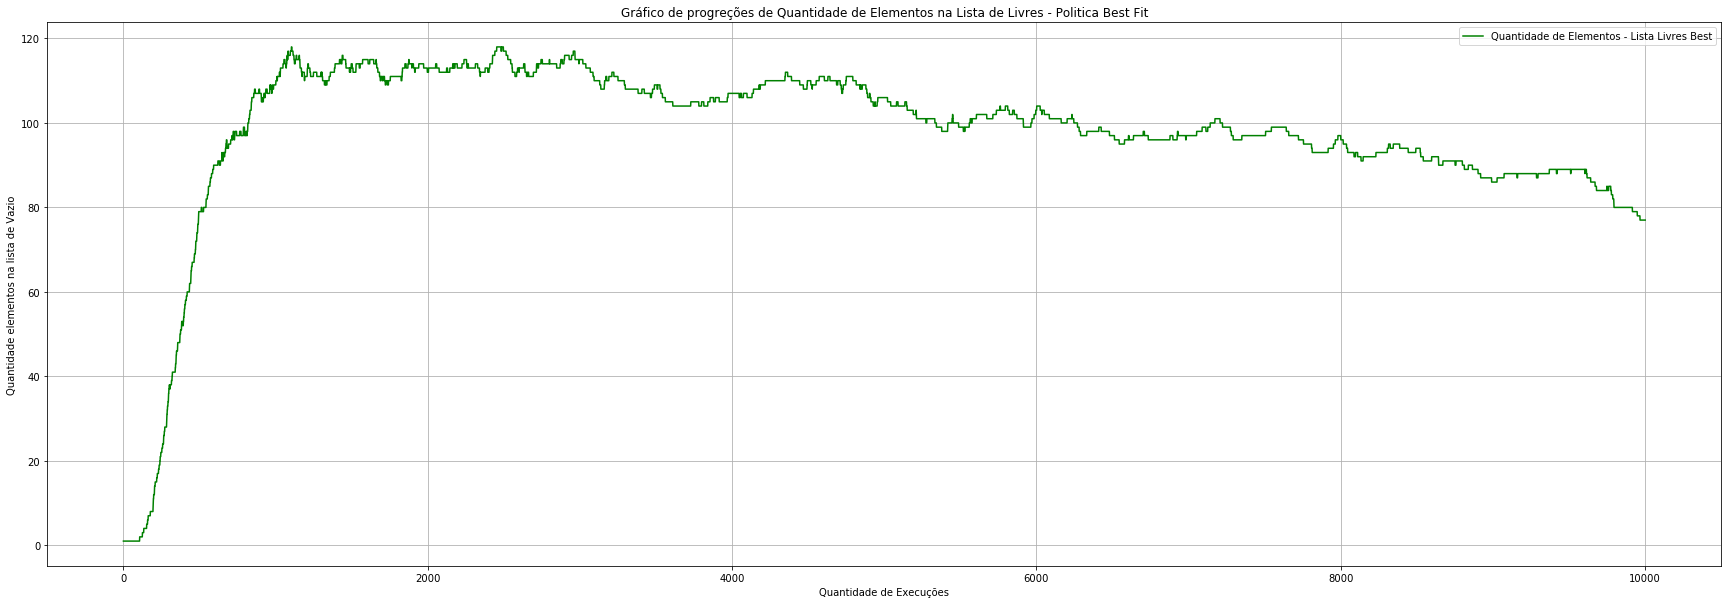

In [17]:
plt.figure()
plt.plot(vetworkload1,qntElementos1,"g-",label="Quantidade de Elementos - Lista Livres Best")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Quantidade de Elementos na Lista de Livres - Politica Best Fit")
plt.ylabel("Quantidade elementos na lista de Vazio")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

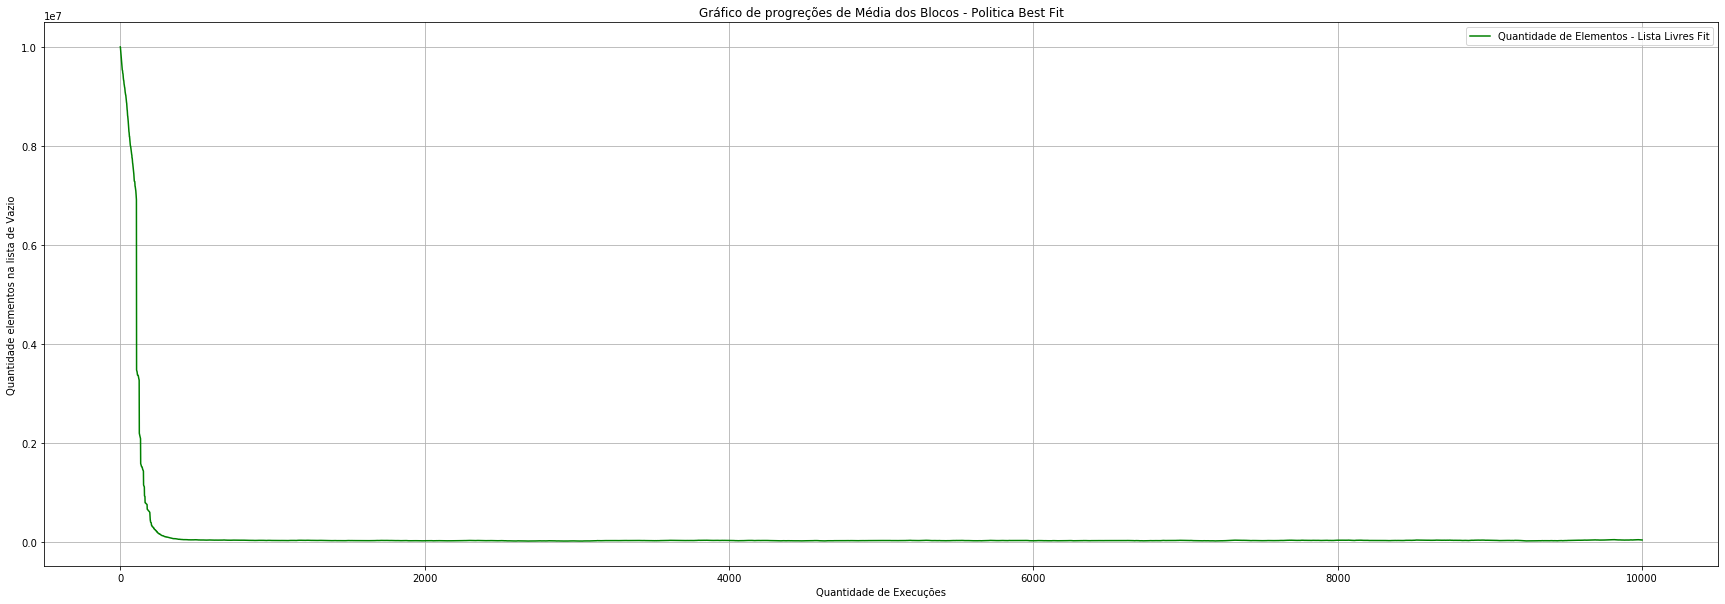

In [18]:
plt.figure()
plt.plot(vetworkload1,media1,"g-",label="Quantidade de Elementos - Lista Livres Fit")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Média dos Blocos - Politica Best Fit")
plt.ylabel("Quantidade elementos na lista de Vazio")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

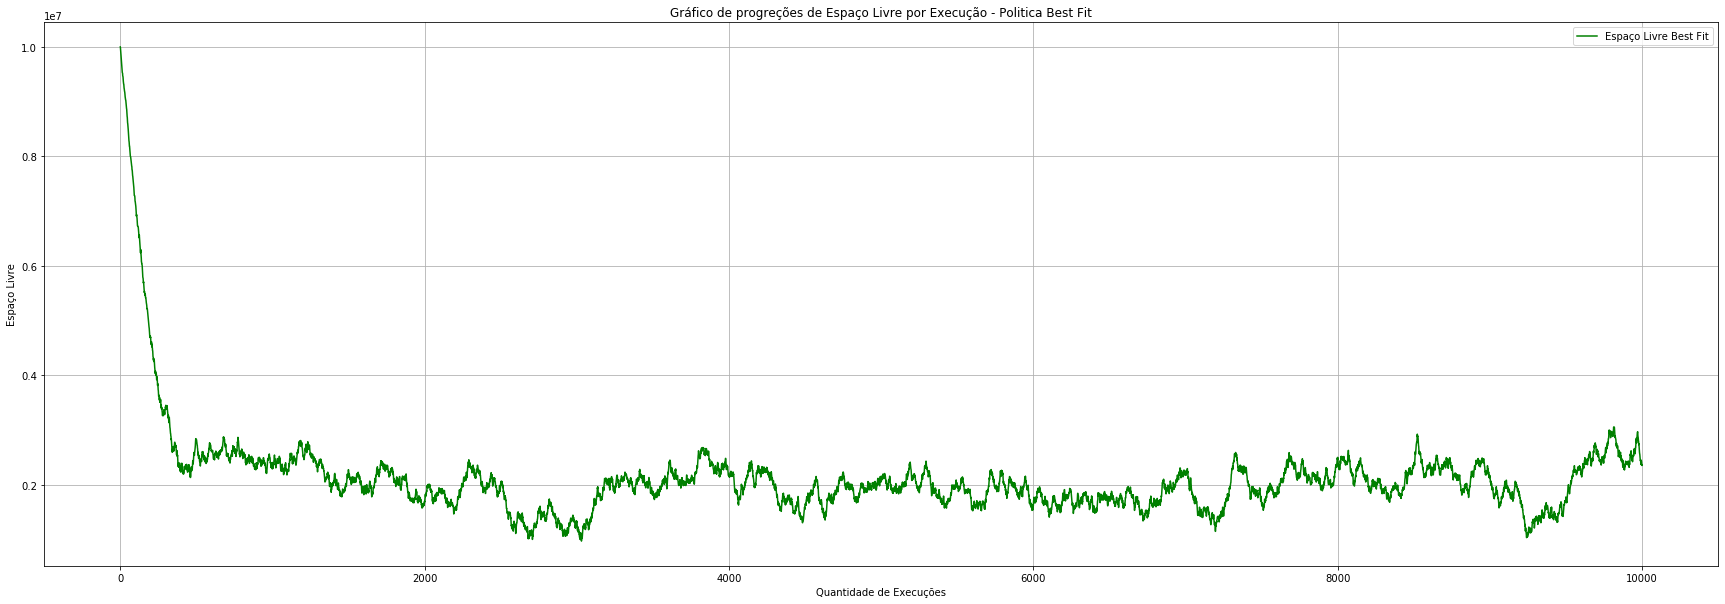

In [19]:
plt.figure()
plt.plot(vetworkload1,espacoVazio1,"g-",label="Espaço Livre Best Fit")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Espaço Livre por Execução - Politica Best Fit")
plt.ylabel("Espaço Livre")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

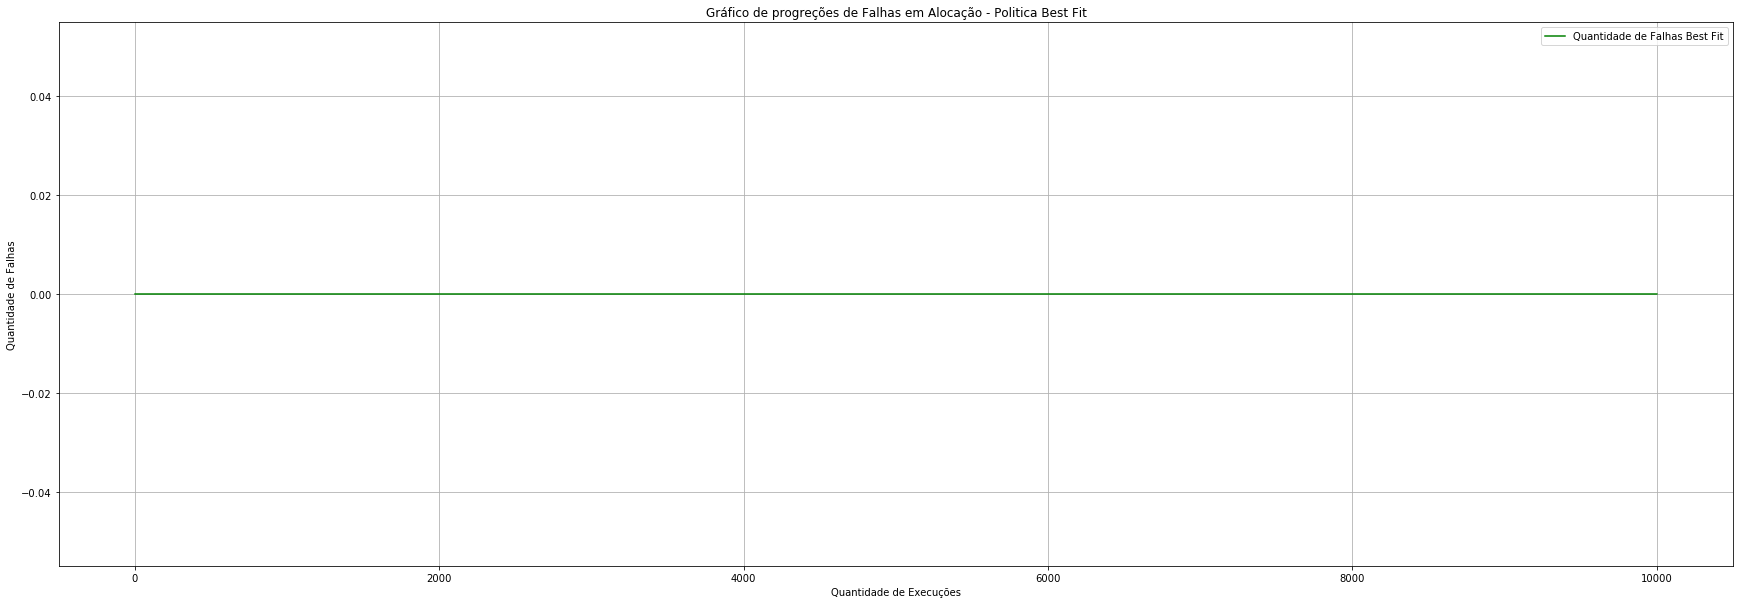

In [20]:
plt.figure()
plt.plot(vetworkload1,qntFalhas1,"g-",label="Quantidade de Falhas Best Fit")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Falhas em Alocação - Politica Best Fit")
plt.ylabel("Quantidade de Falhas")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
qntElementos2   = list(workload2.iloc[:,2].values)
media2          = list(workload2.iloc[:,3].values)
espacoVazio2    = list(workload2.iloc[:,4].values)
qntFalhas2      = list(workload2.iloc[:,5].values)

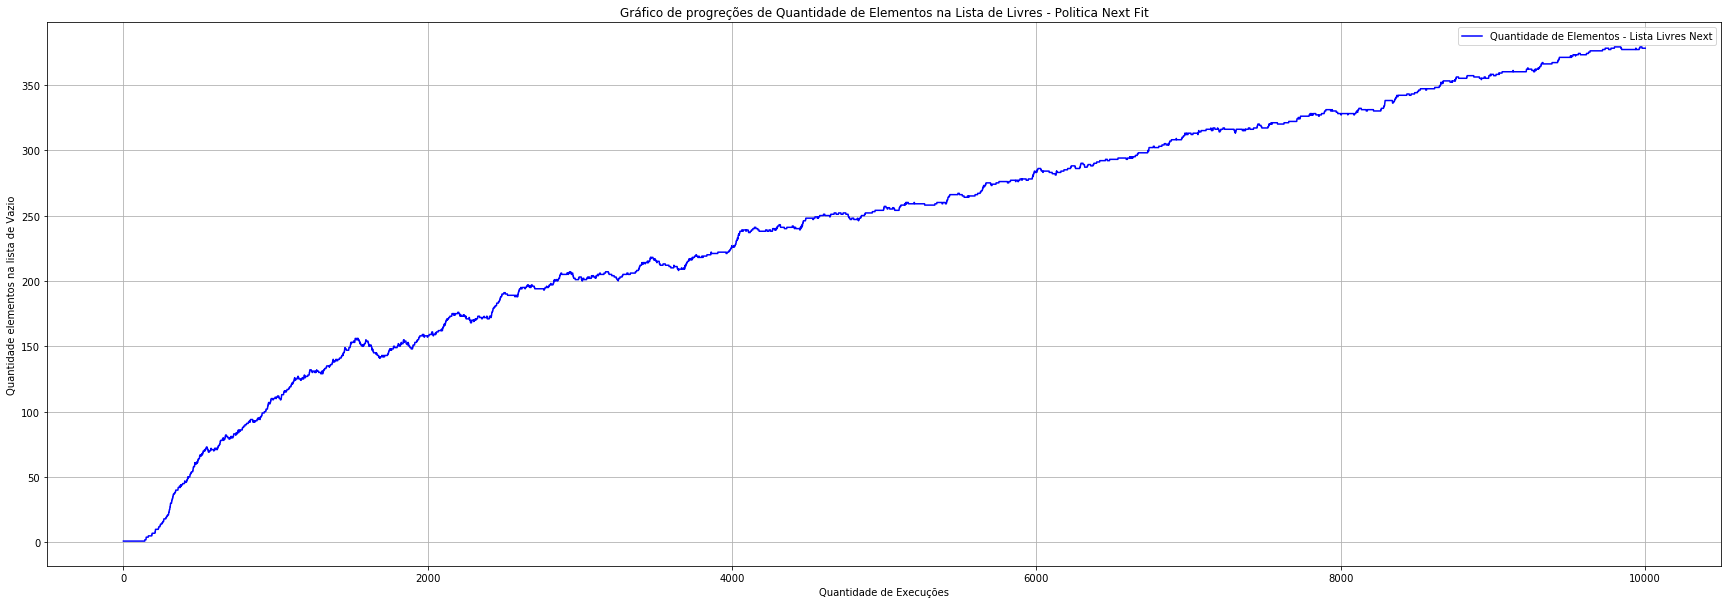

In [22]:
plt.figure()
plt.plot(vetworkload2,qntElementos2,"b-",label="Quantidade de Elementos - Lista Livres Next")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Quantidade de Elementos na Lista de Livres - Politica Next Fit")
plt.ylabel("Quantidade elementos na lista de Vazio")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

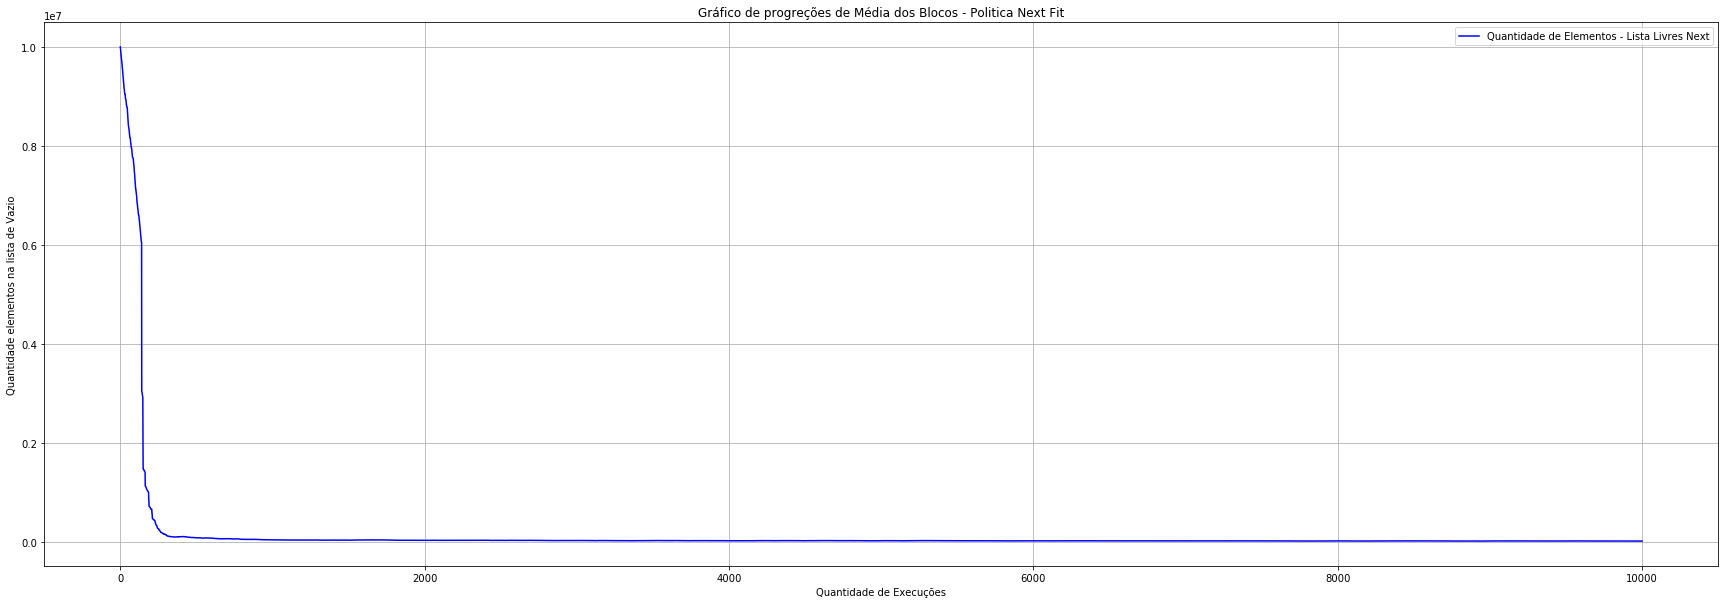

In [23]:
plt.figure()
plt.plot(vetworkload2,media2,"b-",label="Quantidade de Elementos - Lista Livres Next")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Média dos Blocos - Politica Next Fit")
plt.ylabel("Quantidade elementos na lista de Vazio")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

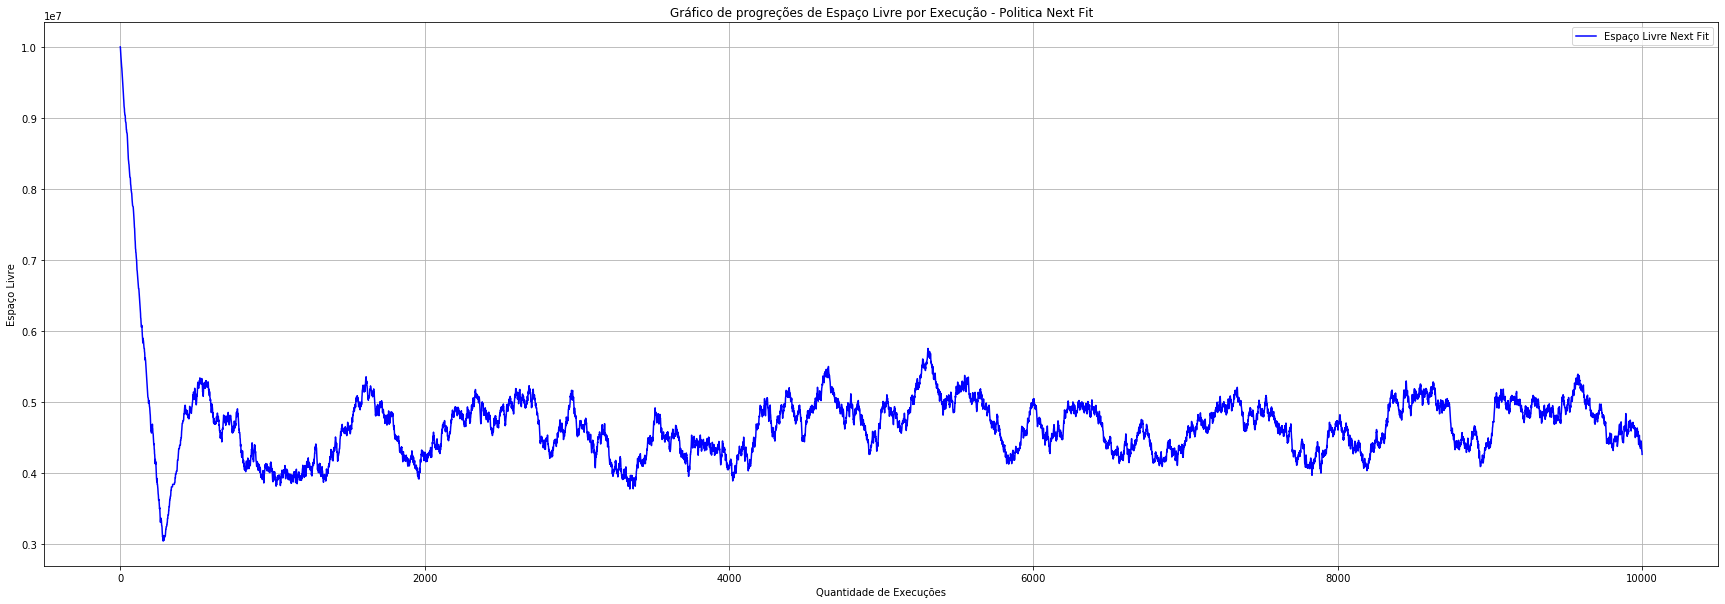

In [24]:
plt.figure()
plt.plot(vetworkload2,espacoVazio2,"b-",label="Espaço Livre Next Fit")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Espaço Livre por Execução - Politica Next Fit")
plt.ylabel("Espaço Livre")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()

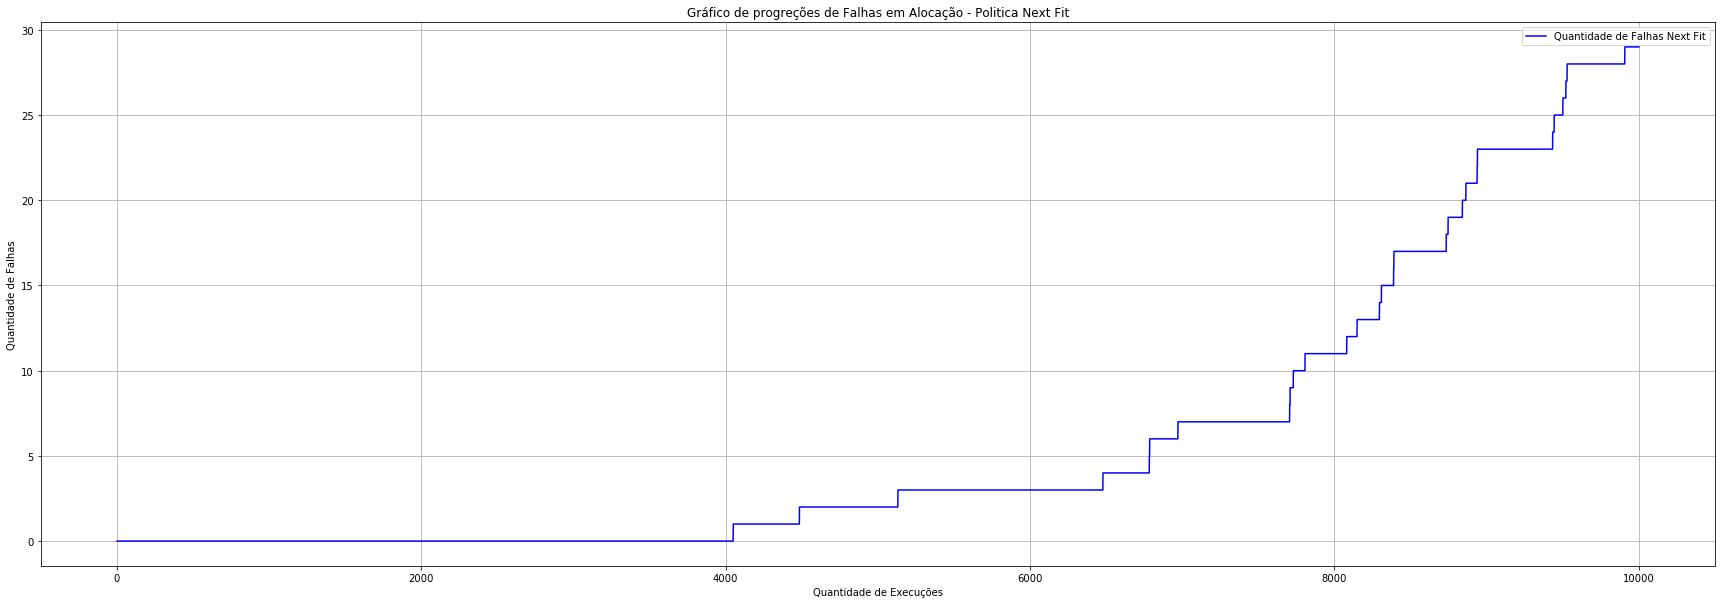

In [25]:
plt.figure()
plt.plot(vetworkload2,qntFalhas2,"b-",label="Quantidade de Falhas Next Fit")
plt.rcParams['figure.figsize'] = (30,10)
plt.title("Gráfico de progreções de Falhas em Alocação - Politica Next Fit")
plt.ylabel("Quantidade de Falhas")
plt.xlabel("Quantidade de Execuções")
plt.legend()
plt.grid(True)
plt.show()